# Running FreeFem++ inside a Notebook

<div align="right"> <a href="mailto:pascal.lafon@utt.fr">Pascal Lafon</a> - Novembre 2020 </div>

----
### Introductory example :
* This notebook presents basic concept to run and display results from `FreeFem++`.
* To use this notebook, you will need to have :
    * `FreeFem++` installed on your machine
    * The file defining the model to used `poisson.edp` in the same folder as this notebook file.
    * You must also check that can run `FreeFem++` using the command line `FreeFem++ poisson.edp`.
----

### Display the model file in the notebook :

The code below load the model file `poisson.edp` in read only mode and print it :

In [24]:
file = open('poisson.edp', 'r')
file_content = file.read()
print (file_content)

load "Element_P3";
int n;

func f = 8*pi^2*cos(2*pi*x)*cos(2*pi*y);
func uD = cos(2*pi*x)*cos(2*pi*y);
func uEx = cos(2*pi*x)*cos(2*pi*y);

for (n=10; n<=640 ; n = 2*n){
  mesh Th = square(n,n);
  fespace Vh(Th,P1);
  Vh uh, vh;

  problem poisson(uh,vh) =
    int2d(Th)(dx(uh)*dx(vh) +
        dy(uh)*dy(vh))
    - int2d(Th)(f*vh)
    + on(1,uh=uD)
    + on(2,uh=uD)
    + on(3,uh=uD)
    + on(4,uh=uD)
    ;

  real start = clock();
  poisson;

  real errorL2 = sqrt(int2d(Th)(abs(uh-uEx)^2));
  cout << "n: " << n << "\n";
  cout << "CPU time: " << clock() - start << endl;
  cout << "Error L2: " << errorL2 << endl;
  cout << "-----------" << endl;
  plot(Th,uh,fill=true,ps="Th.eps");
}


The file `poisson.edp` can be edited in Jupyter Lab with the contextuel menu `Open With\Editor` (right click on the file name in the file list windows of Jupyter Lab)

### Running `FreeFem+` :

The code below use the `!` to run a command shell from a code cell. Here the command to launch `FreeFem++`, here is the same command as the one you use on commmand line.
In this exemple, we specify some options to run `FreeFem++` :
* `-nw`, no windows display
* `-v 0`, minimal information display on output

In [21]:
!FreeFem++ -nw -v 0 poisson.edp

n: 10
CPU time: 0.034799
Error L2: 0.052796
-----------
n: 20
CPU time: 0.00748
Error L2: 0.0138594
-----------
n: 40
CPU time: 0.032746
Error L2: 0.00350845
-----------
n: 80
CPU time: 0.123787
Error L2: 0.000879877
-----------
n: 160
CPU time: 0.507699
Error L2: 0.000220143
-----------
n: 320
CPU time: 2.48496
Error L2: 5.50466e-05
-----------
n: 640
CPU time: 10.7215
Error L2: 1.37623e-05
-----------


### Display results in the notebook :

In the model file `poisson.edp`, we have add the instruction : `plot(Th,uh,fill=true,ps="Th.eps");` which produce a plot (usually display in separate windows if the option `-nw` is ommitted) and here we create a image file `Th.eps` (`eps` i.e encaspulated postscript format).
You can find some detail and help on the `plot` command of `FreeFem++` [here](https://doc.freefem.org/references/functions.html#referenceplot).


The code below display the image file `Th.eps` in the notebook :

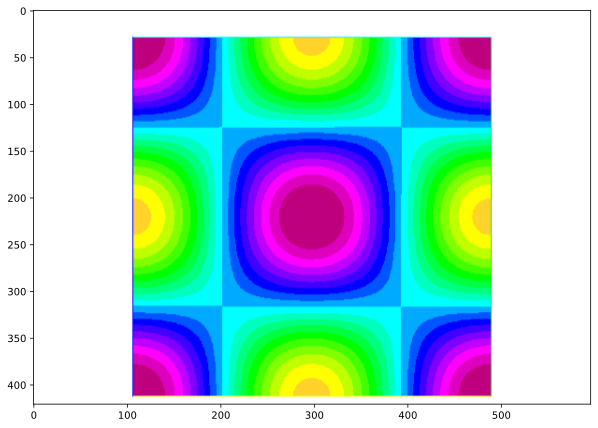

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# 'magic command' to modify the output format of the image 'svg' -> vectorized format (better quality)
%config InlineBackend.figure_format = 'svg'
# Read the image file :
img = mpimg.imread('Th.eps')
# Create a figure (to specify the size)
plt.figure(figsize=(10,10))
# Display the image :
plt.imshow(img)

### Next step : [Pass parameters to  FreeFem++](https://github.com/PasLafon/MP06-FreeFem-in-Notebook/blob/master/FreeFem_in_notebook_02.ipynb)